In [17]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from PIL import Image
import git

repo_url = 'https://github.com/sharkfield913/DeepLearning.git'
local_folder = './DeepLearning'

if not os.path.exists(local_folder):
    git.Git().clone(repo_url, local_folder)

def load_images(path):
    
    dogs = {'골든 리트리버': 0, '꼬똥 드 툴레아': 1, '달마시안': 2, '래브라도 리트리버': 3
            , '말티즈': 4, '바셋 하운드': 5, '보스턴 테리어': 6, '비글': 7
            , '비숑 프리제': 8, '빠삐용': 9, '시츄': 10, '치와와': 11
            , '코커 스파니엘': 12, '퍼그': 13, '페키니즈': 14, '프렌치 불독': 15
            , '그레이하운드': 16, '닥스훈트': 17, '도베르만': 18, '로트와일러': 19
            , '미니핀': 20, '보더콜리': 21, '포메라니안': 22, '슈나우저': 23
            , '불독': 24, '사모예드': 25, '샤페이': 26, '스피츠': 27
            , '시바 이누': 28, '시베리안 허스키': 29, '카네코르소': 30, '알래스칸 말래뮤트': 31
            , '요크셔테리어': 32, '웰시코기': 33, '진돗개': 34}
    
    images = []
    labels = []

    for dog, label in dogs.items():
        print('loading', path, dog, label)
        path_dir = os.path.join(path, dog) 
        file_list = os.listdir(path_dir)
        
        for file_name in file_list:
            img_path = os.path.join(path_dir, file_name)
            image = Image.open(img_path)
            image = np.array(image)
            image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(label)

    print('image count', len(images))
    return images, labels

def label_dog(label):
    dogs_map = {0: '골든 리트리버', 1: '꼬똥 드 툴레아', 2: '달마시안', 3: '래브라도 리트리버',
                4: '말티즈', 5: '바셋 하운드', 6: '보스턴 테리어', 7: '비글',
                8: '비숑 프리제', 9: '빠삐용', 10: '시츄', 11: '치와와',
                12: '코커 스파니엘', 13: '퍼그', 14: '페키니즈', 15: '프렌치 불독',
                16: '그레이하운드', 17: '닥스훈트', 18: '도베르만', 19: '로트와일러',
                20: '미니핀', 21: '보더콜리', 22: '포메라니안', 23: '슈나우저',
                24: '불독', 25: '사모예드', 26: '샤페이', 27: '스피츠',
                28: '시바 이누', 29: '시베리안 허스키', 30: '카네코르소', 31: '알래스칸 말래뮤트',
                32: '요크셔테리어', 33: '웰시코기', 34: '진돗개'}
    return dogs_map[label]

np.random.seed(0)
tf.random.set_seed(0)

repo_path = './DeepLearning/dogs'

x_train, y_train = load_images(repo_path)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=x_train/255.0
x_train,y_train=shuffle(x_train,y_train,random_state=0)


loading ./DeepLearning/dogs 골든 리트리버 0
loading ./DeepLearning/dogs 꼬똥 드 툴레아 1
loading ./DeepLearning/dogs 달마시안 2
loading ./DeepLearning/dogs 래브라도 리트리버 3
loading ./DeepLearning/dogs 말티즈 4
loading ./DeepLearning/dogs 바셋 하운드 5
loading ./DeepLearning/dogs 보스턴 테리어 6
loading ./DeepLearning/dogs 비글 7
loading ./DeepLearning/dogs 비숑 프리제 8
loading ./DeepLearning/dogs 빠삐용 9
loading ./DeepLearning/dogs 시츄 10
loading ./DeepLearning/dogs 치와와 11
loading ./DeepLearning/dogs 코커 스파니엘 12
loading ./DeepLearning/dogs 퍼그 13
loading ./DeepLearning/dogs 페키니즈 14
loading ./DeepLearning/dogs 프렌치 불독 15
loading ./DeepLearning/dogs 그레이하운드 16
loading ./DeepLearning/dogs 닥스훈트 17
loading ./DeepLearning/dogs 도베르만 18
loading ./DeepLearning/dogs 로트와일러 19
loading ./DeepLearning/dogs 미니핀 20
loading ./DeepLearning/dogs 보더콜리 21
loading ./DeepLearning/dogs 포메라니안 22
loading ./DeepLearning/dogs 슈나우저 23
loading ./DeepLearning/dogs 불독 24
loading ./DeepLearning/dogs 사모예드 25
loading ./DeepLearning/dogs 샤페이 26
loading ./DeepLearning/

In [18]:
x_train.shape

(1050, 150, 150, 3)

In [19]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(35,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
33/33 [==============================] - 7s 210ms/step - loss: 4.7594 - accuracy: 0.0333
Epoch 2/10
33/33 [==============================] - 7s 200ms/step - loss: 3.3041 - accuracy: 0.1229
Epoch 3/10
33/33 [==============================] - 7s 199ms/step - loss: 2.2239 - accuracy: 0.4419
Epoch 4/10
33/33 [==============================] - 6s 196ms/step - loss: 0.8828 - accuracy: 0.7790
Epoch 5/10
33/33 [==============================] - 7s 200ms/step - loss: 0.2394 - accuracy: 0.9590
Epoch 6/10
33/33 [==============================] - 7s 199ms/step - loss: 0.0657 - accuracy: 0.9886
Epoch 7/10
33/33 [==============================] - 7s 201ms/step - loss: 0.0158 - accuracy: 0.9990
Epoch 8/10
33/33 [==============================] - 7s 198ms/step - loss: 0.0189 - accuracy: 0.9971
Epoch 9/10
33/33 [==============================] - 6s 196ms/step - loss: 0.0253 - accuracy: 0.9952
Epoch 10/10
33/33 [==============================] - 7s 198ms/step - loss: 0.0178 - accuracy: 0.9962

In [20]:
x_test, y_test=load_images(repo_path)
x_test=np.array(x_test)
x_test=x_test/255.0
y_test=np.array(y_test)

loading ./DeepLearning/dogs 골든 리트리버 0
loading ./DeepLearning/dogs 꼬똥 드 툴레아 1
loading ./DeepLearning/dogs 달마시안 2
loading ./DeepLearning/dogs 래브라도 리트리버 3
loading ./DeepLearning/dogs 말티즈 4
loading ./DeepLearning/dogs 바셋 하운드 5
loading ./DeepLearning/dogs 보스턴 테리어 6
loading ./DeepLearning/dogs 비글 7
loading ./DeepLearning/dogs 비숑 프리제 8
loading ./DeepLearning/dogs 빠삐용 9
loading ./DeepLearning/dogs 시츄 10
loading ./DeepLearning/dogs 치와와 11
loading ./DeepLearning/dogs 코커 스파니엘 12
loading ./DeepLearning/dogs 퍼그 13
loading ./DeepLearning/dogs 페키니즈 14
loading ./DeepLearning/dogs 프렌치 불독 15
loading ./DeepLearning/dogs 그레이하운드 16
loading ./DeepLearning/dogs 닥스훈트 17
loading ./DeepLearning/dogs 도베르만 18
loading ./DeepLearning/dogs 로트와일러 19
loading ./DeepLearning/dogs 미니핀 20
loading ./DeepLearning/dogs 보더콜리 21
loading ./DeepLearning/dogs 포메라니안 22
loading ./DeepLearning/dogs 슈나우저 23
loading ./DeepLearning/dogs 불독 24
loading ./DeepLearning/dogs 사모예드 25
loading ./DeepLearning/dogs 샤페이 26
loading ./DeepLearning/

1/1 [==============================] - 0s 23ms/step
예측: 래브라도 리트리버
정답: 래브라도 리트리버


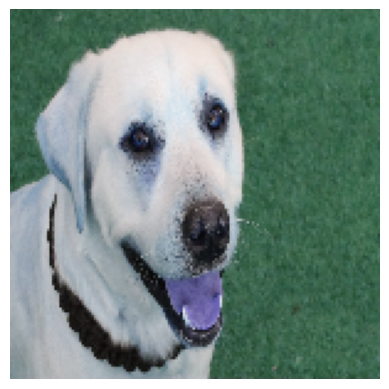

In [37]:
for _ in range(1):
    idx = np.random.randint(0, len(x_test))
    label = y_test[idx]
    image = x_test[idx]
    
    prd = model.predict(np.expand_dims(image, axis=0)).argmax(axis=1)
    print('예측:', label_dog(prd[0]))
    print('정답:', label_dog(label))
    
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.show()